In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [27]:
energy=pd.read_csv("./energydata_complete.csv")
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
X = pd.DataFrame(energy)

In [29]:
X=X.drop(['date'],axis=1)

In [30]:
X.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [31]:
y = pd.DataFrame(energy, columns=["rv2"])

In [32]:
y.head()

,rv2
0,13.275433
1,18.606195
2,28.642668
3,45.410389
4,10.084097


In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [41]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
347/347 [==============================] - 1s 3ms/step - loss: 187.0355 - val_loss: 12.9527
Epoch 2/30
347/347 [==============================] - 1s 3ms/step - loss: 8.7152 - val_loss: 5.4168
Epoch 3/30
347/347 [==============================] - 1s 4ms/step - loss: 3.9983 - val_loss: 2.9627
Epoch 4/30
347/347 [==============================] - 1s 3ms/step - loss: 2.2337 - val_loss: 1.8232
Epoch 5/30
347/347 [==============================] - 2s 5ms/step - loss: 1.3483 - val_loss: 1.1308
Epoch 6/30
347/347 [==============================] - 2s 4ms/step - loss: 0.8918 - val_loss: 0.8127
Epoch 7/30
347/347 [==============================] - 1s 3ms/step - loss: 0.6280 - val_loss: 0.5402
Epoch 8/30
347/347 [==============================] - 1s 3ms/step - loss: 0.4440 - val_loss: 0.4190
Epoch 9/30
347/347 [==============================] - 1s 2ms/step - loss: 0.3404 - val_loss: 0.3547
Epoch 10/30
347/347 [==============================] - 1s 2ms/step - loss: 0.2604 - val_loss: 0.2

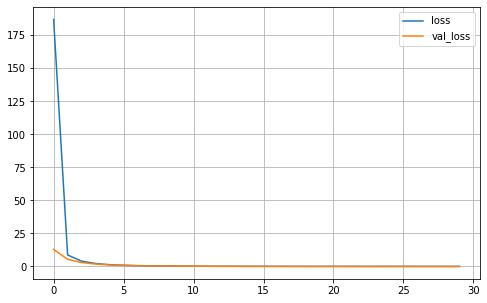

In [42]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [43]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

155/155 [==============================] - 0s 2ms/step - loss: 0.0198


In [46]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=1e-3))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
347/347 [==============================] - 2s 5ms/step - loss: 0.0216 - val_loss: 0.0133
Epoch 2/10
347/347 [==============================] - 1s 2ms/step - loss: 0.0142 - val_loss: 0.0086
Epoch 3/10
347/347 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0072
Epoch 4/10
347/347 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0086
Epoch 5/10
347/347 [==============================] - 2s 5ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 6/10
347/347 [==============================] - 1s 4ms/step - loss: 0.0171 - val_loss: 0.0049
Epoch 7/10
347/347 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 8/10
347/347 [==============================] - 2s 5ms/step - loss: 0.0102 - val_loss: 0.0084
Epoch 9/10
347/347 [==============================] - 1s 4ms/step - loss: 0.0113 - val_loss: 0.0050
Epoch 10/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0051


In [47]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=1e-3))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
347/347 [==============================] - 1s 4ms/step - loss: 0.0127 - val_loss: 0.0145
Epoch 2/100
347/347 [==============================] - 1s 4ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 3/100
347/347 [==============================] - 1s 4ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 4/100
347/347 [==============================] - 2s 5ms/step - loss: 0.0101 - val_loss: 0.0682
Epoch 5/100
347/347 [==============================] - 1s 3ms/step - loss: 0.0121 - val_loss: 0.0104
Epoch 6/100
347/347 [==============================] - 1s 4ms/step - loss: 0.0119 - val_loss: 0.0068
Epoch 7/100
347/347 [==============================] - 2s 4ms/step - loss: 0.0076 - val_loss: 0.0058
Epoch 8/100
347/347 [==============================] - 2s 5ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 9/100
347/347 [==============================] - 1s 3ms/step - loss: 0.0128 - val_loss: 0.0048
Epoch 10/100
347/347 [==============================] - 1s 3ms/step - loss: 0.0061 - val_lo

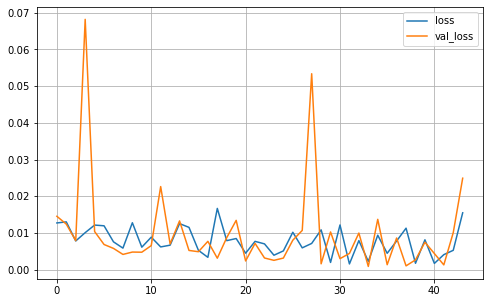

In [48]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.gca().set_ylim(0, 1)
plt.grid(True)